# Batch Coactivity Analysis

## Notebook for preprocessing and analyzing coactivity spine data

In [1]:
import os
import numpy as np
from Lab_Analyses.Spine_Analysis.preprocess_spine_data import organize_dual_spine_data
from Lab_Analyses.Spine_Analysis.grouped_coactivity_analysis import grouped_coactivity_analysis
from Lab_Analyses.Spine_Analysis.longitudinal_spine_characterization import Longitudinal_Spine_Data
from Lab_Analyses.Spine_Analysis.pre_coactivity_plasticity_analysis import Pre_Coactivity_Plasticity
from Lab_Analyses.Utilities.save_load_pickle import load_pickle

### Datasets
Specify mice which mice to be processed and analyzed

In [ ]:
# Mouse ids
id_1 = "JW082"
id_2 = "JW083"
id_3 = "JW090"
id_4 = "JW092"
id_5 = "JW126"
id_6 = "JW129"
id_7 = "JW130"
id_8 = "JW150"

mouse_list = [id_1, id_2, id_3, id_4, id_5, id_6, id_7, id_8]
#mouse_list = [id_4, id_6]

### Preprocessing
Preprocess spine datasets

In [ ]:
# Do you want to reprocess the data
reprocess = False
channels = {"GluSnFr": "GreenCh", "Calcium": "RedCh"}
fov_type = "apical"

# Process data
if reprocess:
    for mouse in mouse_list:
        organize_dual_spine_data(mouse, channels, fov_type=fov_type, redetection=True, save=True, structural=True)

### Grouped Coactivity Analysis
Perform coactivity analysis across all mice and FOVs for a given set of imaging sessions

In [ ]:
# Set up parameters
## Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
coactivity_dir = "Coactivity_Data"
coactivity_path = os.path.join(group_path, experiment_dir, coactivity_dir)

## Analysis parameters
reanalyze = True
save = True
days = ["Early", "Middle", "Late"]
#days = ["Middle"]
followup = True
zscore = False
volume_norm = True
fov_type = "apical"

coactivity_data = {}
for day in days:
    print(f"-{day}")
    coactivity = grouped_coactivity_analysis(
        mouse_list,
        day,
        followup=followup,
        fov_type=fov_type,
        activity_window=(-2,4),
        zscore=zscore,
        volume_norm=volume_norm,
        save=save,
        save_path=coactivity_path,
    )

    coactivity_data[day] = coactivity

In [2]:
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
coactivity_dir = "Coactivity_Data"
coactivity_path = os.path.join(group_path, experiment_dir, coactivity_dir)

load_coactivity = True
if load_coactivity:
    names = ["Early_dFoF_norm_spine_coactivity_data", "Middle_dFoF_norm_spine_coactivity_data", "Late_dFoF_norm_spine_coactivity_data"]
    data = load_pickle(names, coactivity_path)
    days = ["Early", "Middle", "Late"]
    coactivity_data = dict(zip(days, data))

### Longitudinal Analysis
Assess variables longitudinally across the entire training duration

In [ ]:
# Save path
group_path = r"C:\Users\Jake\Desktop\Analyzed_data\grouped"
experiment_dir = "Dual_Spine_Imaging"
longitudinal_dir = "Longitudinal_Data"
longitudinal_path = os.path.join(group_path, experiment_dir, longitudinal_dir)

In [ ]:
## Analysis parmeters
threshold = 0.3
exclude = "Shaft Spine"
save = False
longitudinal_data = Longitudinal_Spine_Data(
    coactivity_data, 
    threshold, 
    exclude, 
    vol_norm=False, 
    save=save, 
    save_path=longitudinal_path)

In [ ]:
# Print out variable names
for key in longitudinal_data.__dict__.keys():
    print(key)

In [ ]:
## Visualize the data
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
figure_path = os.path.join(initial_path, experiment_dir, longitudinal_dir)
longitudinal_data.plot_longitudinal_data(
    variable_name="dend_dend_movement_correlation",
    group_type=None,
    plot_ind="line",
    figsize=(3,4),
    ytitle="ytitle",
    mean_color="black",
    ylim=(-0.2,1),
    save=True,
    save_path=figure_path
)

In [ ]:
import spine_plotting as sp
print(len(longitudinal_data.spine_relative_volumes["Middle"]))
sp.plot_histogram(longitudinal_data.spine_relative_volumes["Middle"], bins=40, max_x=8, avlines=[1], stat="probability", title="relative_volumes", xtitle="Relative Volume", alpha=0.5, figsize=(5,3), save=False, save_path=figure_path)

### Coactivity Plasticity Analysis
Perform analysis to relate subsequent plasticity to coactivity 

In [3]:
## Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
plasticity_dir = "Coactivity_Plasticity"
plasticity_path = os.path.join(group_path, experiment_dir, plasticity_dir)

In [4]:
## Analysis parameters
threshold = 0.3
exclude = "Shaft Spine"
save = True

plasticity_data = {}
for key, value in coactivity_data.items():
    plasticity = Pre_Coactivity_Plasticity(
        value, threshold, exclude, vol_norm=False, save=save, save_path=plasticity_path
    )
    plasticity_data[key] = plasticity

### Visualize Coactivity Plasticity Data
Plot selected data and variables from individual datasets.
Use data generated above of load in a dataset

In [8]:
# Select data to plot
load_data = False
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
figure_path = os.path.join(initial_path, experiment_dir, plasticity_dir, "Early")
if not os.path.isdir(figure_path):
    os.makedirs(figure_path)
if load_data:
    load_name = "Early_dFoF_norm_0.5_coactivity_plasticity_data"
    plot_data = load_pickle([load_name], plasticity_path)[0]
else:
    plot_data = plasticity_data["Early"]


In [6]:
# Print out variable names
for key in plot_data.__dict__.keys():
    print(key)

day
threshold
exclude
vol_norm
parameters
save
save_path
group_dict
relative_volumes
enlarged_spines
shrunken_spines
stable_spines
mouse_id
FOV
dendrite_number
dendrite_length
spine_flags
followup_flags
spine_volumes
spine_volumes_um
followup_volumes
followup_volumes_um
movement_spines
nonmovement_spines
rwd_movement_spines
rwd_nonmovement_spines
movement_dendrites
nonmovement_dendrites
rwd_movement_dendrites
rwd_nonmovement_dendrites
spine_activity_rate
dend_activity_rate
distance_activity_rate
ind_distance_activity_rate
distance_relative_activity_rate
ind_distance_relative_activity_rate
distance_coactivity_rate
ind_distance_coactivity_rate
distance_correlation
ind_distance_correlation
distance_coactivity_rate_norm
ind_distance_coactivity_rate_norm
MRS_distance_coactivity_rate
MRS_distance_coactivity_rate_norm
nMRS_distance_coactivity_rate
nMRS_distance_coactivity_rate_norm
movement_distance_coactivity_rate
movement_distance_coactivity_rate_norm
nonmovement_distance_coactivity_rate
no

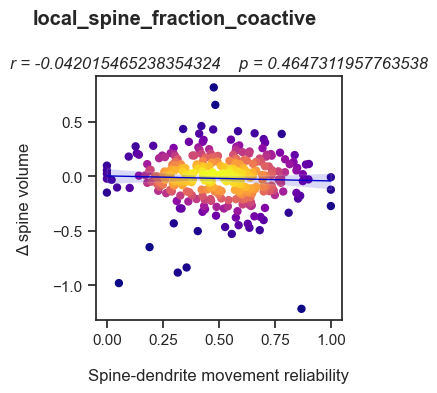

In [77]:
# Correlation Plots
plot_data.plot_volume_correlation(
    variable_name="local_spine_fraction_coactive",
    volume_type="relative_volume",
    CI=95,
    figsize=(3.7,4),
    xtitle="Spine-dendrite movement reliability",
    xlim=None,
    ylim=None,
    face_color="cmap",
    edge_color="white",
    edge_width=1,
    s_size=25,
    s_alpha=0.8,
    line_color="mediumblue",
    line_width=1,
    log_trans=True,
    save=False,
    save_path=figure_path
)

F statistic: 4.361204093954968     p_value: 0.11297349481103536
╒════════════════════════════════════╤═══════════════════╕
│ comparison                         │   adjusted p-vals │
╞════════════════════════════════════╪═══════════════════╡
│ enlarged_spines vs shrunken_spines │          0.471276 │
├────────────────────────────────────┼───────────────────┤
│ enlarged_spines vs stable_spines   │          0.471276 │
├────────────────────────────────────┼───────────────────┤
│ shrunken_spines vs stable_spines   │          0.112631 │
╘════════════════════════════════════╧═══════════════════╛


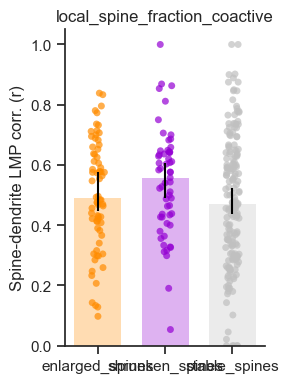

In [78]:
# Group mean activity plots
plot_data.plot_group_scatter_plot(
    variable_name="local_spine_fraction_coactive",
    group_type="plastic_spines",
    mean_type="median",
    err_type="CI",
    figsize=(3,4),
    ytitle="Spine-dendrite LMP corr. (r)",
    ylim=None,
    s_colors=["darkorange", "darkviolet", "silver"],
    s_size=5,
    s_alpha=0.7,
    b_colors=["darkorange", "darkviolet", "silver"],
    b_edgecolors = "black",
    b_err_colors="black",
    b_width=0.7,
    b_linewidth=0,
    b_alpha=0.3,
    test_type="nonparametric",
    test_method="holm-sidak",
    save=False,
    save_path=figure_path,
)

╒══════════════════════════════════════╤═══════════╤══════╤═══════════╤══════════════╕
│                                      │    sum_sq │   df │         F │       PR(>F) │
╞══════════════════════════════════════╪═══════════╪══════╪═══════════╪══════════════╡
│ C(movement_spines)                   │   4.64425 │    1 │   9.42276 │   0.00234041 │
├──────────────────────────────────────┼───────────┼──────┼───────────┼──────────────┤
│ C(plastic_spines)                    │   5.54627 │    2 │   5.62644 │   0.00399462 │
├──────────────────────────────────────┼───────────┼──────┼───────────┼──────────────┤
│ C(movement_spines):C(plastic_spines) │   1.41254 │    2 │   1.43296 │   0.240241   │
├──────────────────────────────────────┼───────────┼──────┼───────────┼──────────────┤
│ Residual                             │ 146.877   │  298 │ nan       │ nan          │
╘══════════════════════════════════════╧═══════════╧══════╧═══════════╧══════════════╛
╒══════════════════════════════════════════

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


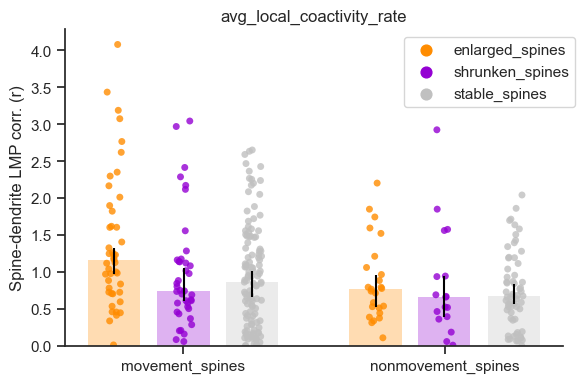

In [87]:

plot_data.plot_multi_group_scatter_plots(
    variable_name="avg_local_coactivity_rate",
    group_type="movement_spines",
    subgroup_type="plastic_spines",
    mean_type="median",
    err_type="CI",
    figsize=(6,4),
    ytitle="Spine-dendrite LMP corr. (r)",
    ylim=None,
    s_colors=["darkorange", "darkviolet", "silver"],
    s_alpha=0.8,
    s_size=5,
    b_colors=["darkorange", "darkviolet", "silver"],
    b_edgecolors="black",
    b_err_colors="black",
    b_width=0.2,
    b_linewidth=0,
    b_alpha=0.3,
    test_method="holm-sidak",
    save=False,
    save_path=figure_path,
)

In [ ]:
plot_data.plot_group_spine_mean_traces(
    group_type="plastic_spines",
    trace_type="nonconj_spine_coactive_calcium_traces",
    exclude=[],
    avlines=[0],
    ahlines=[0,0,0],
    figsize=(3.5,5),
    colors=["darkorange", "forestgreen", "silver"], 
    ylim=None,
    test_method="fdr_bh",
    save=False,
    save_path=figure_path
)

In [ ]:
plot_data.plot_spine_coactivity_distance(
    variable_name="positional_coactivity_norm",
    group_type="plastic_spines",
    figsize=(4,3),
    colors=["darkorange", "darkviolet", "silver"],
    m_size=7,
    ylim=None,
    ytitle="Local Normalized Coactivity Rate",
    test_method="holm-sidak",
    save=True,
    save_path=figure_path,
)

In [ ]:
plot_data.plot_histogram(
    variable="movement_spine_onset",
    bins=30,
    max_lim=None,
    group_type="plastic_spines",
    exclude=["stable_spines"],
    stat="probability",
    avlines="median",
    figsize=(5,5),
    color=["darkorange", "darkviolet"],
    alpha=0.5,
    save=True,
    save_path=figure_path
)

In [ ]:
plot_data.plot_group_mean_heatmaps(
    trace_type="nonconj_spine_coactive_traces",
    group_type="plastic_spines",
    figsize=(10,5),
    hmap_range=(0,1),
    center=None,
    sorted="peak",
    normalize=True,
    cmap="plasma",
    save=False,
    save_path=figure_path
)

-------------------- Comparisions to Chance ----------------------
enlarged_spines vs. shuffle: p above = 0.0092  p below = 0.9915


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis\spine_plotting.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=groups)


shrunken_spines vs. shuffle: p above = 0.9546  p below = 0.0465


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis\spine_plotting.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=groups)


stable_spines vs. shuffle: p above = 0.2937  p below = 0.7064


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis\spine_plotting.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=groups)


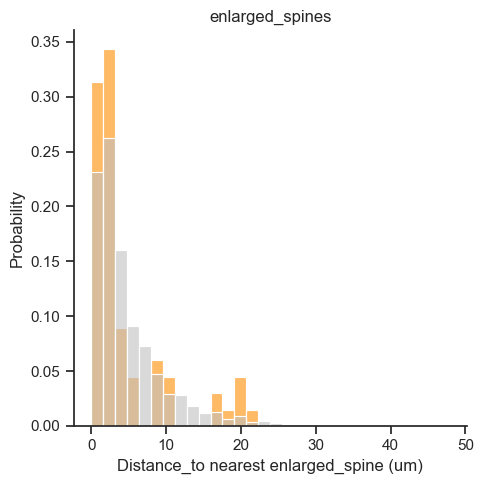

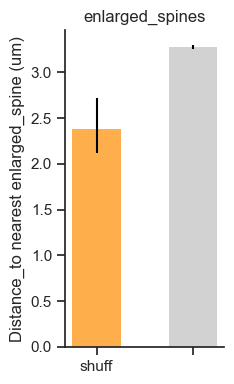

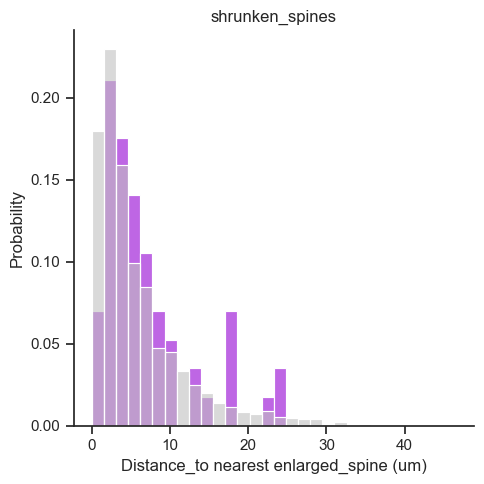

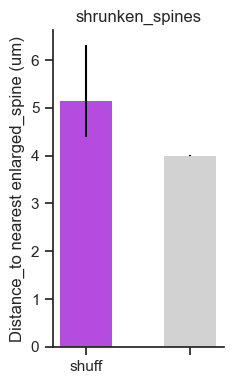

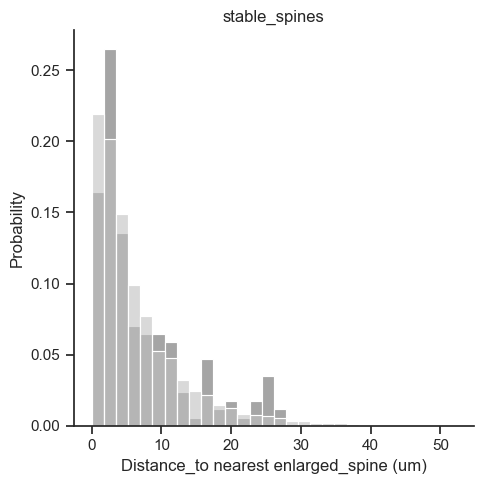

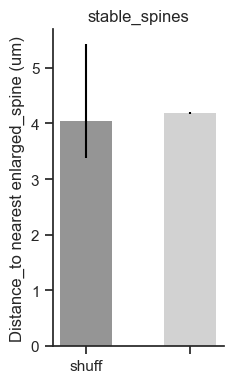

In [85]:
plot_data.plot_cluster_data(
    real_variable="local_nn_enlarged",
    shuff_variable="shuff_nn_enlarged",
    group_type="plastic_spines",
    mean_type="median",
    err_type="CI",
    hist_bins=30,
    hist_size=(5,5),
    bar_size=(2.5,4),
    ytitle="Distance_to nearest enlarged_spine (um)",
    colors=["darkorange", "darkviolet", "dimgrey"],
    err_colors="black",
    b_width=0.5,
    hist_alpha=0.6,
    b_alpha=0.7,
    save=False,
    save_path=figure_path,
)

In [62]:
from Lab_Analyses.Spine_Analysis import spine_plotting as sp

C:\Users\Jake\AppData\Local\Temp\ipykernel_3820\3718734852.py:7: RuntimeWarning: invalid value encountered in true_divide
  y = dend / local


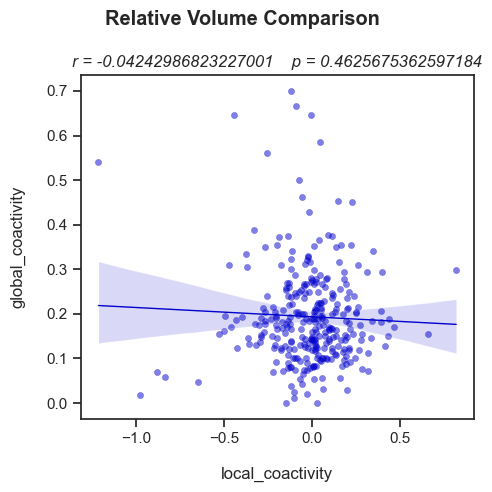

In [84]:
non_local = np.nonzero(~np.isnan(plot_data.spine_activity_rate))[0]
non_dend = np.nonzero(~np.isnan(plot_data.avg_local_coactivity_rate))[0]
non_nan = set(non_local).intersection(non_dend)
non_nan = np.array(list(non_nan))
local = plot_data.spine_activity_rate[non_nan]
dend = plot_data.avg_local_coactivity_rate[non_nan]
y = dend / local
x = plot_data.relative_volumes[non_nan]
y_nan = np.nonzero(~np.isnan(y))[0]
y = y[y_nan]
x = x[y_nan]
x = np.log10(x)
sp.plot_sns_scatter_correlation(
    x,
    y,
    CI=95,
    title="Relative Volume Comparison",
    xtitle="local_coactivity",
    ytitle="global_coactivity",
    marker_size=20,
    
)

In [73]:
class A:
    a = np.array([1,1,1,1])
    b = [2,2,2,2]

In [ ]:
c = A
d = A

In [ ]:
di = {"z": c, "y": d}

In [ ]:
days = ["z","y"]
att = ["a","b"]
for day in days:
    for attr in att:
       print(type(getattr(di[day], attr)))
    